# Latar Belakang
Airbnb adalah jaringan pasar daring dan penginapan rumahan sejawat yang memungkinkan pengguna mendaftarkan atau menyewa properti untuk digunakan dalam jangka pendek. Harga sewanya ditetapkan oleh pemilik properti. Melalui analisa harga properti Airbnb di Bangkok menjadi wawasan bagi pemilik properti dalam menentukan harga yang kompetitif, memahami kebutuhan pasar, serta merancang strategi yang lebih efektif dalam pengelolaan properti untuk meningkatkan pendapatan penyewaan properti Airbnb di Bangkok

# Pernyataan Masalah
Pemilik properti Ingin **meningkatkan pendapatan dan daya tarik properti Airbnb di Bangkok**. 

Sebagai seorang data scientist, saya akan menjawab pertanyaan berikut:

**Bagaimana meningkatkan pendapatan dan daya tarik properti Airbnb di Bangkok?**

## Analisis yang Diperlukan

- **Analisis Harga Properti Berdasarkan Lokasi**:

Mengidentifikasi lokasi-lokasi dengan harga properti tinggi dan rendah untuk menyesuaikan harga secara cerdas.
- **Pengaruh Tipe Kamar (Room Type) terhadap Harga**:

Memahami perbedaan harga antar jenis kamar untuk menawarkan diversifikasi yang lebih baik kepada calon penyewa.
- **Ketersediaan Properti dan Harga**:

Menganalisis hubungan antara ketersediaan properti sepanjang tahun dengan harga untuk menentukan kebijakan pemesanan yang lebih optimal.

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import helpers as hlp

# Data Understanding

## Load Dataset

In [55]:
# Melakukan import Library
import pandas as pd

df = pd.read_csv('Airbnb Listings Bangkok.csv')
df

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.759830,100.541340,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,NaN,NaN,2,358,0
2,2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,NaN,NaN,1,365,0
3,3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.788230,100.572560,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,NaN,NaN,3,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaN,NaN,1,362,0
15850,15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaN,NaN,14,365,0
15851,15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaN,NaN,14,365,0
15852,15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaN,NaN,14,365,0


## Data Information
Info dataset Airbnb Listings Bangkok:  

* Unnamed: 0 : index dari dataset
* id : pengenal unik Airbnb untuk tempat tersebut.
* name : Nama dari listings.
* host_id : nomor identifikasi unik Airbnb untuk tuan rumah/host.
* host_name : Nama tuan rumah/host. Biasanya, hanya nama depan.
* neighborhood : Lingkungan/wilayah tempat listing berada berdasarkan latitude dan longitude.
* Latitude : Menggunakan proyeksi World Geodetic System (WGS84) untuk koordinat lintang.
* Longitude : Menggunakan proyeksi World Geodetic System (WGS84) untuk koordinat bujur.
* room_type : Tipe kamar yang tersedia untuk listings [Seluruh rumah/apartemen |Kamar pribadi| Ruang bersama| Hotel]
* price : Harga sewa listing dalam mata uang lokal (baht)
* minimum_nights : Jumlah minimum masa sewa listing permalam (peraturan kalender mungkin berbeda).
* number_of_reviews : Jumlah ulasan yang dimiliki listing.
* last_review : Tanggal ulasan terakhir/terbaru.
* reviews_per_month : Jumlah rata-rata ulasan yang diterima perbulan berdasarkan terakhir mendapat review.
* calculated_host_listings_count : Jumlah listing yang dimiliki pemilik pada rentang saat ini dalam geografi kota/wilayah.
* available_365 : ketersediaan listing dalam 365 hari ke depan
* number_of_reviews_ltm : Jumlah ulasan yang dimiliki listing (dalam 12 bulan terakhir).

# Data Cleaning

## Menampilkan Informasi Terkait DataFrame

In [56]:
df.head()

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaN,NaN,2,358,0
2,2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaN,NaN,1,365,0
3,3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,NaN,NaN,3,365,0


In [57]:
print('Melihat jumlah baris dan kolom di dataset Airbnb')
print(f'baris di dataset Airbnb {df.shape[0]}')
print(f'kolom di dataset Airbnb {df.shape[1]}')
print('Melihat informasi dataset')
df.info()

Melihat jumlah baris dan kolom di dataset Airbnb
baris di dataset Airbnb 15854
kolom di dataset Airbnb 17
Melihat informasi dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      15854 non-null  int64  
 1   id                              15854 non-null  int64  
 2   name                            15846 non-null  object 
 3   host_id                         15854 non-null  int64  
 4   host_name                       15853 non-null  object 
 5   neighbourhood                   15854 non-null  object 
 6   latitude                        15854 non-null  float64
 7   longitude                       15854 non-null  float64
 8   room_type                       15854 non-null  object 
 9   price                           15854 non-null  int64  
 10  minimum_nights        

## Descriptive Statistic

In [58]:
df.describe()

,Unnamed: 0,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,15854.000000,1.585400e+04,1.585400e+04,15854.000000,15854.000000,1.585400e+04,15854.000000,15854.000000,10064.000000,15854.000000,15854.000000,15854.000000
mean,7926.500000,1.579397e+17,1.541058e+08,13.745144,100.559903,3.217704e+03,15.292355,16.654157,0.813145,13.889618,244.378643,3.481519
std,4576.799919,2.946015e+17,1.318726e+08,0.043040,0.050911,2.497212e+04,50.815020,40.613331,1.090196,30.269848,125.843224,8.916937
min,0.000000,2.793400e+04,5.892000e+04,13.527300,100.329550,0.000000e+00,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,3963.250000,2.104509e+07,3.974431e+07,13.720090,100.529690,9.000000e+02,1.000000,0.000000,0.120000,1.000000,138.000000,0.000000
50%,7926.500000,3.503734e+07,1.224556e+08,13.738490,100.561415,1.429000e+03,1.000000,2.000000,0.435000,4.000000,309.000000,0.000000
75%,11889.750000,5.256154e+07,2.390547e+08,13.759497,100.585150,2.429000e+03,7.000000,13.000000,1.060000,13.000000,360.000000,3.000000
max,15853.000000,7.908162e+17,4.926659e+08,13.953540,100.923440,1.100000e+06,1125.000000,1224.000000,19.130000,228.000000,365.000000,325.000000


## Normality Check

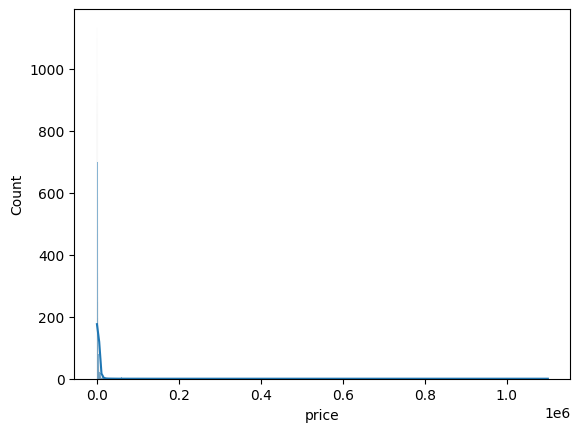

In [59]:
sns.histplot(df['price'], kde = True)
plt.show()

In [60]:
hlp.checkSkew(df['price'])

'right skewed'

In [61]:
hlp.checkKurto(df['price'])

'lepto kurtic (menjulang)'

In [62]:
len(df['price'])

15854

In [63]:
from scipy.stats import normaltest
# Uji normalitas dengan D'Agostino and Pearson's Test
dagostino_stat, dagostino_p_value = normaltest(df['price'])

if dagostino_p_value >= 0.05:
    # Ho
    print(f" pvalue={dagostino_p_value}, pvalue>=0.05, artinya gagal menolak Ho. Kita anggap Data terdistribusi normal")
else:
    # H1/Ha
    print(f" pvalue={dagostino_p_value}, pvalue<=0.05, artinya berhasil menolak Ho. Kita anggap Data tidak terdistribusi normal")

 pvalue=0.0, pvalue<=0.05, artinya berhasil menolak Ho. Kita anggap Data tidak terdistribusi normal


## Handle missing value

In [64]:
df.isna().sum()

Unnamed: 0                           0
id                                   0
name                                 8
host_id                              0
host_name                            1
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       5790
reviews_per_month                 5790
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

In [65]:
# persentase missing value di tiap kolom
df.isna().sum()/df.shape[0]*100

Unnamed: 0                         0.000000
id                                 0.000000
name                               0.050460
host_id                            0.000000
host_name                          0.006308
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       36.520752
reviews_per_month                 36.520752
calculated_host_listings_count     0.000000
availability_365                   0.000000
number_of_reviews_ltm              0.000000
dtype: float64

berdasarkan proporsi missing value diatas

- Missing Value:
  - kurang dari 10%
    - *name* : 5.04%
    - *host_name* : 0.6%
  - lebih dari 10%
    - *last_review* : 36.52%
    - *reviews_per_month* : 36.52%


**Menangani missing value pada dataset**

Pada dataset ini kita akan melakukan dua penanganan yaitu mengisi data dan menghapus baris.
pada pengisian data kita akan mengisi secara domain knowledge dan secara statistik menggunakan median (numerik) atau modus (untuk kolom kategori).

### a.Handle Missing Value pada kolom `name`

In [66]:
df[df['name'].isna()]

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
439,439,4549768,NaN,18852579,Titawan,Phra Khanong,13.69406,100.59619,Private room,1080,5,0,NaN,NaN,1,365,0
544,544,4720818,NaN,24386225,Cherry,Din Daeng,13.77562,100.57346,Private room,1200,1,0,NaN,NaN,1,365,0
572,572,4245018,NaN,22030043,Parichart,Bang Phlat,13.78376,100.49821,Private room,1200,1,0,NaN,NaN,1,365,0
669,669,6148415,NaN,31895202,Chira,Bang Na,13.68276,100.60894,Entire home/apt,2424,2,0,NaN,NaN,1,365,0
1030,1030,8055144,NaN,42521288,Nantida,Vadhana,13.74126,100.55761,Private room,5000,3,0,NaN,NaN,1,365,0
1282,1282,10000742,NaN,51374914,Diamond Bangkok,Ratchathewi,13.75328,100.52928,Private room,930,1,6,2017-05-13,0.07,1,365,0
1594,1594,10710165,NaN,55347997,Khaneungnit,Vadhana,13.71757,100.60464,Private room,1000,1,0,NaN,NaN,1,365,0
2075,2075,13142743,NaN,73275200,Pakaphol,Khlong Toei,13.72566,100.56416,Private room,850,1,2,2017-12-11,0.03,3,220,0


In [67]:
df[df['host_name']=='Pakaphol']

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
1981,1981,13400326,Errday Guest House,73275200,Pakaphol,Khlong Toei,13.72427,100.56443,Private room,950,1,1,2020-02-19,0.03,3,1,0
1982,1982,13400758,Errday Guest House,73275200,Pakaphol,Khlong Toei,13.72373,100.56415,Private room,36363,1,0,NaN,NaN,3,1,0
2075,2075,13142743,NaN,73275200,Pakaphol,Khlong Toei,13.72566,100.56416,Private room,850,1,2,2017-12-11,0.03,3,220,0


In [68]:
df.loc[2075, 'name'] = "Errday Guest House"

In [69]:
df[df['host_name']=='Pakaphol']

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
1981,1981,13400326,Errday Guest House,73275200,Pakaphol,Khlong Toei,13.72427,100.56443,Private room,950,1,1,2020-02-19,0.03,3,1,0
1982,1982,13400758,Errday Guest House,73275200,Pakaphol,Khlong Toei,13.72373,100.56415,Private room,36363,1,0,NaN,NaN,3,1,0
2075,2075,13142743,Errday Guest House,73275200,Pakaphol,Khlong Toei,13.72566,100.56416,Private room,850,1,2,2017-12-11,0.03,3,220,0


In [70]:
df[df['name'].isna()]

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
439,439,4549768,NaN,18852579,Titawan,Phra Khanong,13.69406,100.59619,Private room,1080,5,0,NaN,NaN,1,365,0
544,544,4720818,NaN,24386225,Cherry,Din Daeng,13.77562,100.57346,Private room,1200,1,0,NaN,NaN,1,365,0
572,572,4245018,NaN,22030043,Parichart,Bang Phlat,13.78376,100.49821,Private room,1200,1,0,NaN,NaN,1,365,0
669,669,6148415,NaN,31895202,Chira,Bang Na,13.68276,100.60894,Entire home/apt,2424,2,0,NaN,NaN,1,365,0
1030,1030,8055144,NaN,42521288,Nantida,Vadhana,13.74126,100.55761,Private room,5000,3,0,NaN,NaN,1,365,0
1282,1282,10000742,NaN,51374914,Diamond Bangkok,Ratchathewi,13.75328,100.52928,Private room,930,1,6,2017-05-13,0.07,1,365,0
1594,1594,10710165,NaN,55347997,Khaneungnit,Vadhana,13.71757,100.60464,Private room,1000,1,0,NaN,NaN,1,365,0


In [71]:
# Menghapus baris dari ke 7 data missing value
df = df.dropna(subset=['name'])
df.isna().sum()

Unnamed: 0                           0
id                                   0
name                                 0
host_id                              0
host_name                            1
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       5784
reviews_per_month                 5784
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

### b.Handle Missing Value pada kolom `host_name`

In [72]:
df[df['host_name'].isna()]

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
3571,3571,19682464,Cozy Hideaway,137488762,NaN,Bang Kapi,13.76999,100.63769,Private room,1399,3,1,2017-07-29,0.02,1,365,0


In [73]:
# Menghapus nilai kosong pada kolom 'host_name'
df = df.dropna(subset=['host_name'])
df.isna().sum()

Unnamed: 0                           0
id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       5784
reviews_per_month                 5784
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

### c. Menangani missing value pada kolom `last_review`

In [74]:
df[df['last_review'].isna()]

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
1,1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,NaN,NaN,2,358,0
2,2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,NaN,NaN,1,365,0
4,4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,NaN,NaN,3,365,0
7,7,1738669,1 chic bedroom apartment in BKK,7045870,Jiraporn,Chatu Chak,13.829250,100.567370,Entire home/apt,1461,1,0,NaN,NaN,1,365,0
14,14,959254,"Deluxe Condo, Nana, Pool/GYM/Sauna",5153476,Natcha,Khlong Toei,13.715160,100.568060,Entire home/apt,1400,30,0,NaN,NaN,1,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaN,NaN,1,362,0
15850,15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaN,NaN,14,365,0
15851,15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaN,NaN,14,365,0
15852,15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaN,NaN,14,365,0


In [75]:
# Convert 'last_review' to datetime
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')

# Check the dtype after conversion
print(df['last_review'].dtype)

datetime64[ns]


In [76]:
df['last_review'].fillna('0-0-0000', inplace= True)

/var/folders/zt/mhtdtw4n2l16fvmxkb0zhs400000gn/T/ipykernel_1193/4208757790.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0-0-0000' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  df['last_review'].fillna('0-0-0000', inplace= True)


In [77]:
df_plot = df.groupby(by='room_type')[['price']].sum().reset_index()
df_plot

,room_type,price
0,Entire home/apt,30881885
1,Hotel room,1965373
2,Private room,17670954
3,Shared room,481033


### d. Menangani missing value pada kolom `reviews_per_month`

In [78]:
df[df['reviews_per_month'].isna()]

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
1,1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,0-0-0000,NaN,2,358,0
2,2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,0-0-0000,NaN,1,365,0
4,4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,0-0-0000,NaN,3,365,0
7,7,1738669,1 chic bedroom apartment in BKK,7045870,Jiraporn,Chatu Chak,13.829250,100.567370,Entire home/apt,1461,1,0,0-0-0000,NaN,1,365,0
14,14,959254,"Deluxe Condo, Nana, Pool/GYM/Sauna",5153476,Natcha,Khlong Toei,13.715160,100.568060,Entire home/apt,1400,30,0,0-0-0000,NaN,1,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,0-0-0000,NaN,1,362,0
15850,15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,0-0-0000,NaN,14,365,0
15851,15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,0-0-0000,NaN,14,365,0
15852,15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,0-0-0000,NaN,14,365,0


In [79]:
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)
df.isna().sum()

Unnamed: 0                        0
id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64

### e. Menangani missing value pada kolom `Unnamed: 0`

In [80]:
df.drop(columns="Unnamed: 0", inplace=True)
df.isna().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64

### Penanganan missing value secara keseluruhan

**fill nan**

- Penanganan pada kolom ***last_review*** dan ***reviews_per_month***:
Karena missing value melebihi 10% maka perlu diisi datanya dengan tanggal kosong `0-0-0000` untuk kolom ***last_review*** dan rata-rata nya 0 untuk kolom ***reviews_per_month***.

**drop column**

- Drop column pada kolom ***unnamed: 0*** dilakukan karena memiliki nilai yang sama dengan `index` dataframe

- Mengisi kolom name berdasarkan kolom ***calculated_host_listings_count*** dan ***host_name*** karena jika ***calculated_host_listings_count*** memiliki nilai lebih dari 1 maka seharusnya terdapat baris dengan ***host_name*** yang memiliki nilai ***Pakaphol*** mempunyai lebih dari 1 baris dengan kolom ***name*** yang sama yaitu `Errday Guest House`. Jika ***calculated_host_listings_count*** memiliki nilai 1 akan kita drop karena tidak dapat diisi berdasarkan kolom ***calculated_host_listings_count*** dan ***host_name***.  
- Baris pada kolom ***host_name*** dilakukan penghapusan karena tidak dapat diisi berdasarkan baris/kolom manapun

## Check Duplicate

In [81]:
df.duplicated().sum()

0

In [82]:
df.to_csv('Airbnb Listings Bangkok_cleaned.csv')

Setelah di check tidak terdapat duplikasi data pada dataset ini

# Data Visualization

menampilkan visualisasi menggunakan median karena kolom price tidak terdistribusi normal

## Analisis Harga Properti Berdasarkan Lokasi:

In [83]:
# Analisis Harga Properti Berdasarkan Lokasi (Neighbourhood)
neighbourhood_price = df.groupby('neighbourhood')['price'].median().sort_values(ascending=False)

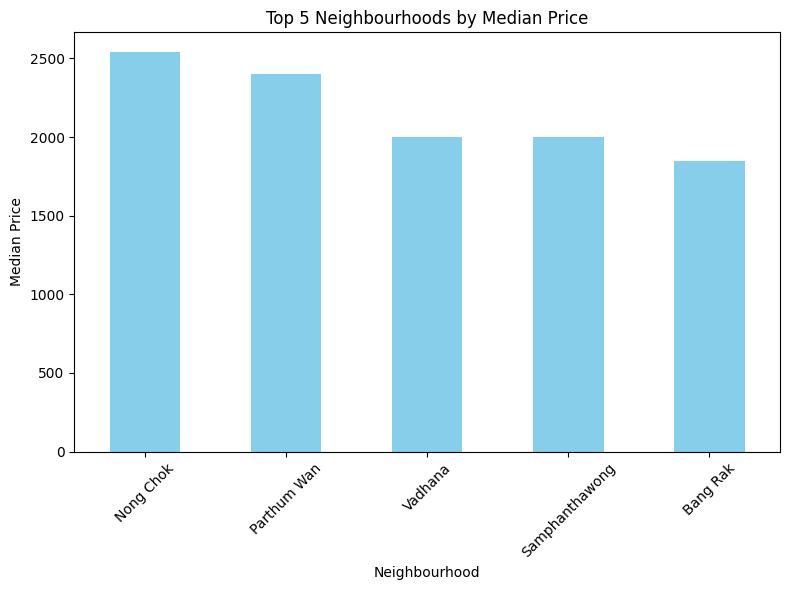

In [84]:
top_5_neighbourhoods = neighbourhood_price.head(5)

# Visualisasi 5 Neighbourhoods teratas berdasarkan Median Price
plt.figure(figsize=(8, 6))
top_5_neighbourhoods.plot(kind='bar', color='skyblue')
plt.title('Top 5 Neighbourhoods by Median Price')
plt.xlabel('Neighbourhood')
plt.ylabel('Median Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Pengaruh Tipe Kamar (Room Type) terhadap Harga:

In [85]:
roomtype_price = df.groupby('room_type')['price'].median().sort_values(ascending=False)

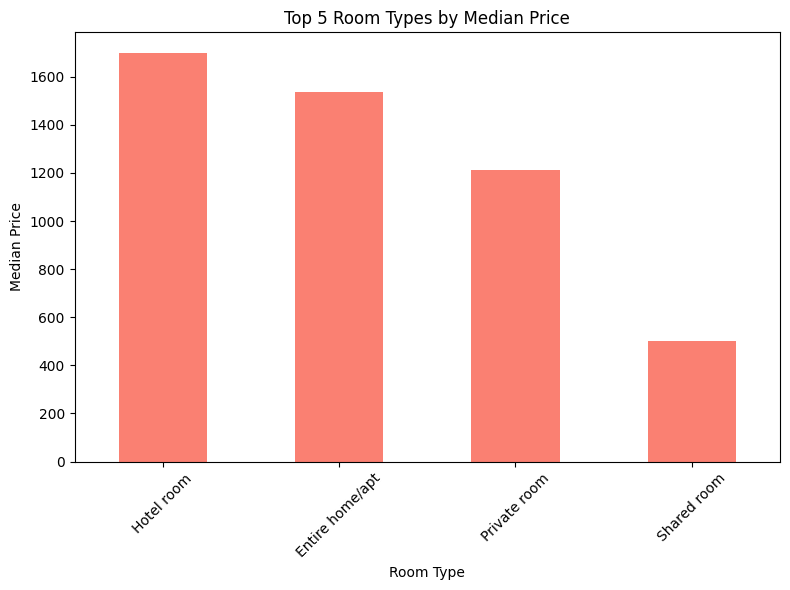

In [86]:
# Analisis Pengaruh Tipe Kamar terhadap Harga
top_5_roomtypes = roomtype_price.head(5)

# Visualisasi 5 Room Types teratas berdasarkan Median Price
plt.figure(figsize=(8, 6))
top_5_roomtypes.plot(kind='bar', color='salmon')
plt.title('Top 5 Room Types by Median Price')
plt.xlabel('Room Type')
plt.ylabel('Median Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Ketersediaan Properti dan Harga:

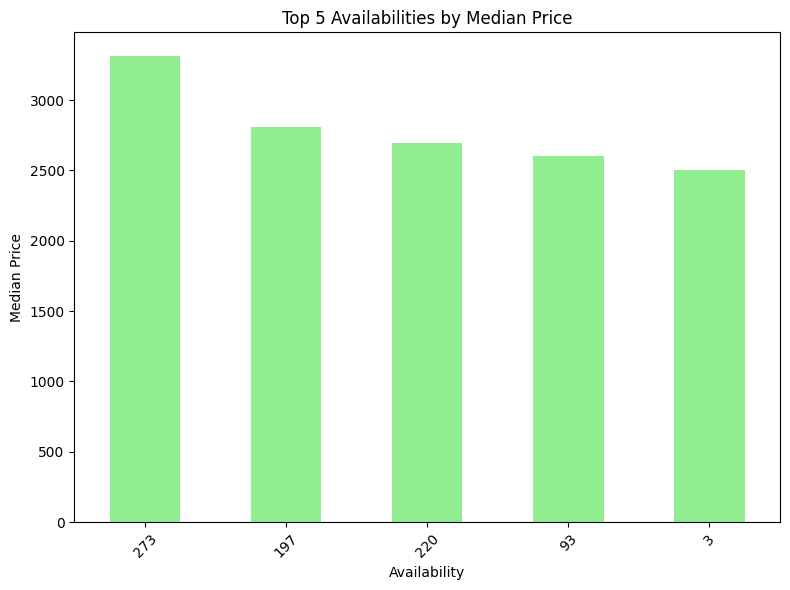

In [87]:
# Analisis Ketersediaan Properti dan Harga
availability_price = df.groupby('availability_365')['price'].median().sort_values(ascending=False)
top_5_availabilities = availability_price.head(5)

# Visualisasi 5 Availability teratas berdasarkan Median Price
plt.figure(figsize=(8, 6))
top_5_availabilities.plot(kind='bar', color='lightgreen')
plt.title('Top 5 Availabilities by Median Price')
plt.xlabel('Availability')
plt.ylabel('Median Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [88]:
# Menghitung korelasi menggunakan metode Pearson
correlation = df.corr(method='spearman', numeric_only = True)['price'].sort_values(ascending=False)
print(correlation)

price                             1.000000
calculated_host_listings_count    0.084539
id                                0.077407
number_of_reviews_ltm             0.043723
host_id                           0.025220
reviews_per_month                 0.017281
availability_365                 -0.000515
number_of_reviews                -0.020601
latitude                         -0.047650
longitude                        -0.069126
minimum_nights                   -0.102403
Name: price, dtype: float64
